In [1]:
import importlib
import utilsHannes as utilsH

from nuscenes import NuScenes
from nuscenes.prediction import PredictHelper

from nuscenes.eval.prediction.splits import get_prediction_challenge_split

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
importlib.reload(utilsH)

version = "v1.0-mini"
DATAROOT = "data/sets/nuscenes"
subset = "mini_train"
seconds_of_history_used = 2.0

# --------------------------------------------------------------------------
# Use get_and_format_data as a wrapping function:
img_list, img_tensor_list, agent_state_vector_list, future_xy_local_list = utilsH.get_and_format_data(version, DATAROOT, subset, seconds_of_history_used)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.363 seconds.
Reverse indexing ...
Done reverse indexing in 0.3 seconds.


/home/hannes-ubuntu/anaconda3/envs/nuscenesNew/lib/python3.7/site-packages/nuscenes/map_expansion/map_api.py:1823: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
/home/hannes-ubuntu/anaconda3/envs/nuscenesNew/lib/python3.7/site-packages/nuscenes/map_expansion/map_api.py:1824: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  interiors = [int_coords(pi.coords) for poly in polygons for pi in poly.interiors]


In [3]:
importlib.reload(utilsH)

version = "v1.0-mini"
DATAROOT = "data/sets/nuscenes"
subset = "mini_train"

# --------------------------------------------------------------------------
# Use the sub-functions directly:
nuscenes = NuScenes('v1.0-mini', dataroot=DATAROOT)
mini_train = get_prediction_challenge_split('mini_train', dataroot=DATAROOT)
helper = PredictHelper(nuscenes)

# # FOR SMALL TEST:
# data_set = mini_train[:50]
# else:
data_set = mini_train

seconds_of_history_used = 1.5

instance_token_list, sample_token_list = utilsH.get_instance_tokens_and_sample_tokens(data_set)

instance_token_list, sample_token_list = utilsH.remove_short_sequences(seconds_of_history_used, instance_token_list, sample_token_list)

instance_token_list, sample_token_list = utilsH.extract_one_instance_per_sequence(seconds_of_history_used, instance_token_list, sample_token_list)

img_list, agent_state_vector_list, future_xy_local_list = utilsH.get_data_and_ground_truth(nuscenes, helper, seconds_of_history_used, instance_token_list, sample_token_list)

img_tensor_list = utilsH.create_img_tensor(img_list)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.300 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


data_set at index 4: bc38961ca0ac4b14ab90e547ba79fbb6_f1e3d9d08f044c439ce86a2d6fcca57b
agent_state_vector at index 4: tensor([[9.0783, 0.6008, 0.0000]])
future_xy_local at index 4:
[[-0.29354777  3.34668937]
 [-0.42006699  8.70861233]
 [-0.5467473  13.82791425]
 [-0.75323613 18.61060422]
 [-0.94647532 23.12413727]
 [-1.0315138  27.55555696]
 [-1.32069127 31.75470037]
 [-1.67371225 35.29721603]
 [-1.97815124 37.85282298]
 [-2.43699988 40.6379025 ]
 [-2.90035247 42.74170035]
 [-3.48701218 45.07576619]]


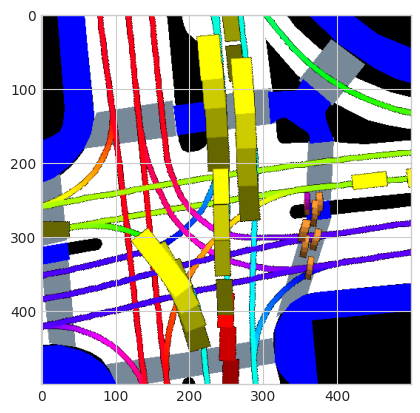

In [4]:
# Test objects for specific index

test_index = 4 #Den ser ut att bryta mellan 108 och 109 exempelvis

print(f"data_set at index {test_index}: {data_set[test_index]}")
# print(f"instance_token_list at index {test_index}: {instance_token_list[test_index]}")
# print(f"sample_token_list at index {test_index}: {sample_token_list[test_index]}")
plt.imshow(img_list[test_index])
print(f"agent_state_vector at index {test_index}: {agent_state_vector_list[test_index]}")
print(f"future_xy_local at index {test_index}:")# {future_xy_local_list[test_index]}")
print(future_xy_local_list[test_index])

In [5]:
importlib.reload(utilsH)

## Create video

# output_filename = 'test_output_video_2fps_dt2_50.avi'
output_filename = f'test_output_video_2fps_length_{len(mini_train)}.avi'#Daniel
utilsH.create_video(img_list, output_filename, fps=2)

In [6]:
from nuscenes.prediction.models.backbone import ResNetBackbone
from nuscenes.prediction.models.mtp import MTP
from nuscenes.prediction.models.covernet import CoverNet
import torch

backbone = ResNetBackbone('resnet50')
mtp = MTP(backbone, num_modes=2)

# Note that the value of num_modes depends on the size of the lattice used for CoverNet.
covernet = CoverNet(backbone, num_modes=64)

In [7]:
test_index = 45

logits = covernet(img_tensor_list[test_index], agent_state_vector_list[test_index])

sofmaxy = torch.nn.Softmax(dim=1)
outputy = sofmaxy(logits)
print(torch.sum(outputy))
print(outputy)

tensor(1., grad_fn=<SumBackward0>)
tensor([[0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0168, 0.0142, 0.0193, 0.0167,
         0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0186,
         0.0171, 0.0142, 0.0191, 0.0155, 0.0142, 0.0142, 0.0158, 0.0142, 0.0156,
         0.0172, 0.0151, 0.0178, 0.0164, 0.0166, 0.0142, 0.0163, 0.0150, 0.0150,
         0.0150, 0.0142, 0.0142, 0.0205, 0.0142, 0.0150, 0.0142, 0.0179, 0.0142,
         0.0163, 0.0172, 0.0142, 0.0175, 0.0153, 0.0142, 0.0142, 0.0142, 0.0161,
         0.0172, 0.0184, 0.0186, 0.0146, 0.0163, 0.0187, 0.0168, 0.0142, 0.0155,
         0.0163]], grad_fn=<SoftmaxBackward0>)


In [8]:
import pickle

#Epsilon is the amount of coverage in the set, 
#i.e. a real world trajectory is at most 8 meters from a trajectory in this set
#We released the set for epsilon = 2, 4, 8. Consult the paper for more information
#on how this set was created

#PATH_TO_EPSILON_8_SET = "/data/sets/nuscenes-prediction-challenge-trajectory-sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_8.pkl"
PATH_TO_EPSILON_8_SET = "data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_8.pkl"
trajectories = pickle.load(open(PATH_TO_EPSILON_8_SET, 'rb'))

#Saved them as a list of lists
trajectories = torch.Tensor(trajectories)

# Hannes kommenterar bort
# #Print 5 most likely predictions
# trajectories[logits.argsort(descending=True)[:5]]


# Hannes 
newTraj = trajectories[logits.argsort(descending=True)[:5]]

Shape of set of all trajectories = (64, 12, 2)


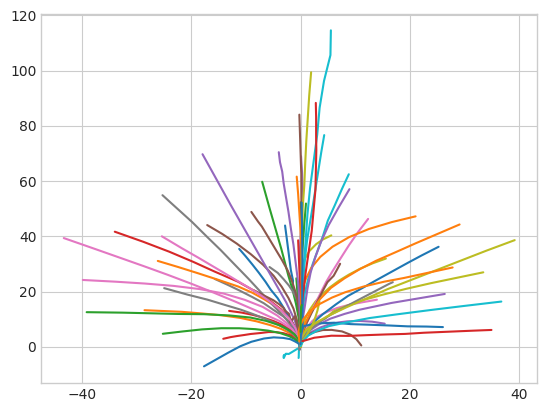

outputy.argsort(descending=True)[0][:numbersOfDisplayedProbabilities] = tensor([39,  7, 20, 59, 17])
[ 0 40 44 38 37 32 47 50 25 23 22 51 19 52 16 42 14  1 13 12 11 61 10  9
  2  6  3  4 15 57 34 36 41 35 28 49 62 21 26 24 53 45 58 63 33 30 31  8
 60  5 18 27 54 46 48 29 43 55 56 17 59 20  7 39]
[0.020521412, 0.019311177, 0.01909623, 0.018703207, 0.018638942]
tensor([[0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0168, 0.0142, 0.0193, 0.0167,
         0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0142, 0.0186,
         0.0171, 0.0142, 0.0191, 0.0155, 0.0142, 0.0142, 0.0158, 0.0142, 0.0156,
         0.0172, 0.0151, 0.0178, 0.0164, 0.0166, 0.0142, 0.0163, 0.0150, 0.0150,
         0.0150, 0.0142, 0.0142, 0.0205, 0.0142, 0.0150, 0.0142, 0.0179, 0.0142,
         0.0163, 0.0172, 0.0142, 0.0175, 0.0153, 0.0142, 0.0142, 0.0142, 0.0161,
         0.0172, 0.0184, 0.0186, 0.0146, 0.0163, 0.0187, 0.0168, 0.0142, 0.0155,
         0.0163]], grad_fn=<SoftmaxBackward0>)
Shape of set of top pred

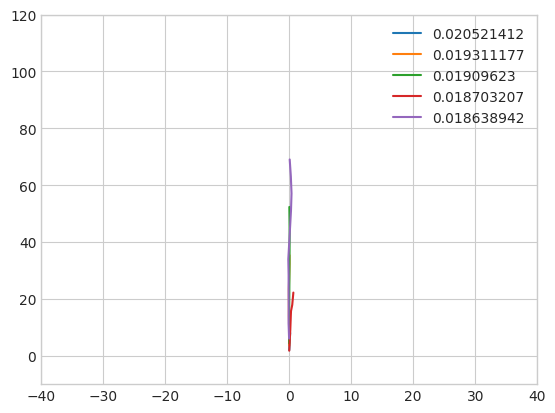

In [9]:
# Hannes cell
import numpy as np

### Choose which trajectory sets to use 
# with open('data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_2.pkl', 'rb') as f:
#     data = pickle.load(f)
# with open('data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_4.pkl', 'rb') as f:
#     data = pickle.load(f)
with open('data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_8.pkl', 'rb') as f:
    data = pickle.load(f)

allTrajectories = np.array(data)
print(f"Shape of set of all trajectories = {allTrajectories.shape}")
# print(allTrajectories)

### Plot all trajectories
modes = np.arange(allTrajectories.shape[0])
timesteps = np.arange(12) # 12 timesteps (which is maximum), can be reduced
for mode in modes:
    plt.plot(allTrajectories[mode,timesteps,0],allTrajectories[mode,timesteps,1])
plt.show()


### Plot selected trajectories
numbersOfDisplayedProbabilities = 5
# topPredictedTrajectories = allTrajectories[logits.argsort(descending=True)[0][:numbersOfDisplayedProbabilities]] # Choose top 5 predictions
topPredictedTrajectories = allTrajectories[outputy.argsort(descending=True)[0][:numbersOfDisplayedProbabilities]] # Choose top 5 predictions

# print(allTrajectories)
print(f"outputy.argsort(descending=True)[0][:numbersOfDisplayedProbabilities] = {outputy.argsort(descending=True)[0][:numbersOfDisplayedProbabilities]}")
# print(topPredictedTrajectories)
# predictedProbabilities = outputy[0][outputy.argsort(descending=True)[0][:5]]

# tmpOutputy = outputy.detach().clone()
# print(tmpOutputy)
# predictedProbabilities = []
# for topPrediction in range(numbersOfDisplayedProbabilities):
#     predictedProbabilitiesIndex = [tmpOutputy.argmax()]
#     print(predictedProbabilitiesIndex)
#     tmpOutputy[0][predictedProbabilitiesIndex] = 0
#     predictedProbabilities.append(predictedProbabilitiesIndex)

## TO GET INDICES
outputyValues = outputy.detach().numpy().squeeze()
predictedProbabilitiesIndices = np.argsort(outputyValues)
# topProbabilitiesIndices = predictedProbabilities[0][::-1][0:numbersOfDisplayedProbabilities]
topProbabilitiesIndices = predictedProbabilitiesIndices[::-1][0:numbersOfDisplayedProbabilities]
# predictedProbabilities = outputy.argsort(descending=True)
# topProbabilities = predictedProbabilities[0][0:5]
# topProbabilities = topProbabilitiesIndices

# print(outputyValues)
## TO GET VALUES 
topProbabilities = []
for index in topProbabilitiesIndices:
    topProbabilities.append(outputyValues[index])

print((predictedProbabilitiesIndices))
print(topProbabilities)
print(outputy)
print(f"Shape of set of top predicted trajectories = {topPredictedTrajectories.shape}")
modes2 = np.arange(topPredictedTrajectories.shape[0])
# timesteps = np.arange(12)
for mode in modes2:
    plt.plot(allTrajectories[mode,timesteps,0],allTrajectories[mode,timesteps,1])
plt.ylim([-10,120])
plt.xlim([-40,40])
# plt.legend(["1th prediction", "2nd prediction", "3rd prediction", "4th prediction", "5th prediction"])
plt.legend(topProbabilities)
plt.show()


# Test line for pushing
